In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from cycler import cycler
from IPython.display import display
import datetime
%matplotlib inline
import seaborn as sns

#from sklearn.decomposition import PCA

# plt.rcParams['axes.facecolor'] = '#0057b8' # blue
# plt.rcParams['axes.prop_cycle'] = cycler(color=['#ffd700'] +　plt.rcParams['axes.prop_cycle'].by_key()['color']

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 必要なライブラリのインストール 
# !kaggle competitions download -c tabular-playground-series-apr-2022
# !pip install pycaret
# !conda update scikit-learn

In [2]:
train = pd.read_csv('./tabular-playground-series-apr-2022/train.csv')
train_labels = pd.read_csv('./tabular-playground-series-apr-2022/train_labels.csv')
test = pd.read_csv('./tabular-playground-series-apr-2022/test.csv')

In [3]:
train

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424


In [4]:
train_labels

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
25963,25963,1
25964,25964,0
25965,25965,1
25966,25966,1


In [5]:
train['subject'].value_counts()

437    11940
1      10500
635     9480
647     8640
87      7740
       ...  
486      420
519      420
265      360
73       300
472      120
Name: subject, Length: 672, dtype: int64

In [6]:
pd.options.display.float_format = '{:.10f}'.format
train.describe()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000,1558080.0000000000
mean,12983.5000000000,331.6330868762,29.5000000000,0.0004365526,-0.0010349822,-0.2178045042,-0.0021565548,-0.0018289029,-0.0016517846,-0.0004122917,-0.0000262067,-0.0001298393,0.0013655841,0.0003315801,-0.0037332906,-0.0117260547
std,7496.3182952271,195.8256570754,17.3181078400,2.6586840764,4.4041995530,2.2980018095,3.9341843159,1.6836846058,1.5908178762,3.3451434028,3.2434282778,4.5015338666,2.5929132384,1.9173332543,4.5325684365,39.1176704943
min,0.0000000000,0.0000000000,0.0000000000,-375.0633693972,-434.5976890756,-31.6594761171,-408.3761061947,-23.6260129660,-74.9827973074,-470.5045537341,-407.0114503817,-536.1000000000,-270.3468208092,-43.4127062515,-427.0586419753,-612.5494458653
25%,6491.7500000000,161.7500000000,14.7500000000,-0.5000000000,-0.4831932773,-0.6461530560,-0.4929203540,-0.4729927690,-0.4786836200,-0.4927140255,-0.5022900763,-0.5000000000,-0.5151734104,-0.4787938647,-0.4835390947,-0.5805626598
50%,12983.5000000000,335.0000000000,29.5000000000,-0.0030911901,0.0031512605,0.0000000000,0.0000000000,-0.0015895774,0.0029917726,0.0009107468,-0.0022900763,0.0000000000,-0.0014450867,-0.0016558215,0.0030864198,0.0000000000
75%,19475.2500000000,501.0000000000,44.2500000000,0.4845440495,0.4926470588,0.3338469440,0.4893805310,0.4701564643,0.5056095737,0.4927140255,0.4847328244,0.5000000000,0.5086705202,0.4780385777,0.4938271605,0.5703324808
max,25967.0000000000,671.0000000000,59.0000000000,335.8245749614,449.5913865546,1.6666666667,436.6504424779,24.8728649794,77.9154824233,442.5009107468,331.2541984733,630.1000000000,367.9812138728,41.8655879619,448.0205761317,630.5110826939


In [7]:
# data = train.merge(train_labels, on='sequence', how='left')
# data = data.set_index("sequence")

# from pycaret.classification import *
# setup(data = data, target = 'state', session_id=123)

In [8]:
# # モデルの比較
# compare_models()

In [9]:
# # Random Forestのモデルを作成
# rf = create_model('rf')

In [10]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# scaler = StandardScaler()

# data = train.merge(train_labels, on='sequence', how='left')
# data_iloc = data.iloc[:, 3:16]
# data_std = pd.DataFrame(scaler.fit_transform(data_iloc), columns=data_iloc.columns)
# data_concat = pd.concat([data[['sequence', 'subject', 'step', 'state']], data_std], axis=1)
# data = data_concat.set_index("sequence")

# # データの分割
# train_x = data.drop(['state'], axis=1)
# train_y = data['state'] # 正解クラス
# (train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

In [11]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score

# ###ランダムフォレストはGPUが使えない
# ###https://www.kaggle.com/questions-and-answers/114074
# # モデル構築
# random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
# random_forest.fit(train_x, train_y)

# # 予測
# y_pred = random_forest.predict(test_x)

# #モデルを作成する段階でのモデルの識別精度
# trainaccuracy_random_forest = random_forest.score(train_x, train_y)
# print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

# #作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
# accuracy_random_forest = accuracy_score(test_y, y_pred)
# print('Accuracy: {}'.format(accuracy_random_forest))

In [12]:
df_group = train.groupby(['sequence']).mean().drop('step', axis=1)
df_group_reset = df_group.reset_index().drop('subject',axis=1)
df_group_reset
# df_group_reset['subject'] = df_group_reset['subject'].astype(str)
# df_one_hot_encoded = pd.get_dummies(df_group_reset)
# df_one_hot_encoded

,sequence,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,0.0417439464,-0.0130252101,0.7393055556,0.0342035398,-0.0547741865,0.0185365246,0.0165452338,0.0551526718,0.0316666667,-0.0104166667,-0.0150747540,0.0103909465,-1.2869849389
1,1,-0.0692941783,-0.0199579832,-1.6027733693,0.1201622419,0.1474987533,-0.0020319122,-0.0537795993,-0.0097455471,-0.0750000000,-0.0238559730,0.3270654195,0.1999142661,-1.6040849673
2,2,-0.0015455951,0.0250000000,-1.0087641671,-0.0247935103,-0.1743724806,-0.0003615059,0.0009259259,0.1621501272,0.0100000000,-0.0010356455,0.0188129406,-0.0029320988,0.0009448707
3,3,0.0298686244,-0.0491771709,0.4947660503,0.0334808260,-0.0180227424,0.0023435552,0.0111870067,0.0463358779,-0.0450000000,-0.0039619461,0.0173938725,-0.0266803841,-0.0037084399
4,4,0.0591318908,0.0149159664,0.9000000000,-0.0562684366,0.0042910797,-0.0066442284,0.0562386157,-0.0048473282,-0.0550000000,0.0575867052,-0.0006497405,-0.0996570645,0.0000284172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,25963,0.1007727975,0.0070728291,0.3329682845,-0.0016961652,-0.0132301147,0.0131513338,0.0683970856,0.0473791349,-0.0683333333,0.0414137765,0.0071190642,-0.0466735254,-0.0085819835
25964,25964,0.0171818650,0.0048144258,-0.4291530560,0.0215486726,-0.0213816336,0.0287833458,0.0171523983,0.0133587786,-0.0133333333,0.0194966281,-0.0189199396,0.0062242798,-0.0732878659
25965,25965,-0.0064657393,0.0044467787,-0.5954030560,-0.0084808260,0.0297622387,-0.0037895787,0.0041438980,0.0165139949,-0.0233333333,0.0055154143,0.0837308273,0.0045438957,0.0204390452
25966,25966,-0.0404173107,0.0032563025,-0.2979718798,-0.0364601770,0.0904763018,0.0054475193,-0.0195051609,-0.0251145038,0.0283333333,-0.0241329480,0.0189615772,-0.0398662551,-2.0506109690


<AxesSubplot:>

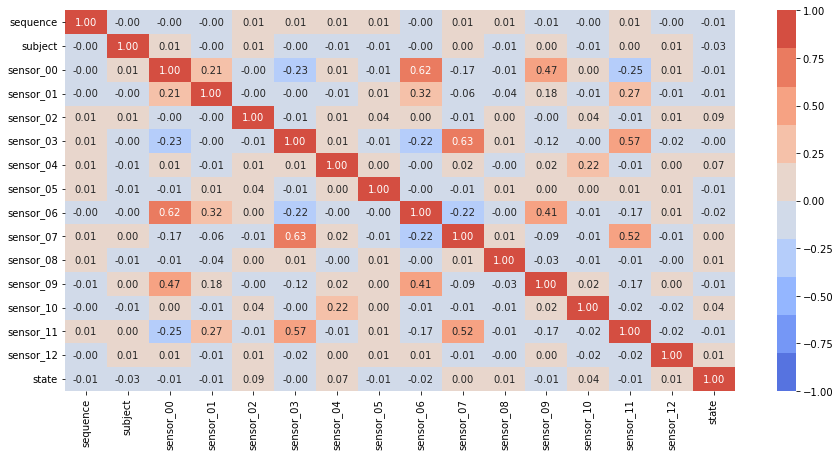

In [13]:
df = df_group.merge(train_labels, on='sequence', how='left')
cor = df.corr()

plt.figure(figsize = (15,7))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_group_reset.merge(train_labels, on='sequence', how='left')
data

,sequence,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,0.0417439464,-0.0130252101,0.7393055556,0.0342035398,-0.0547741865,0.0185365246,0.0165452338,0.0551526718,0.0316666667,-0.0104166667,-0.0150747540,0.0103909465,-1.2869849389,0
1,1,-0.0692941783,-0.0199579832,-1.6027733693,0.1201622419,0.1474987533,-0.0020319122,-0.0537795993,-0.0097455471,-0.0750000000,-0.0238559730,0.3270654195,0.1999142661,-1.6040849673,1
2,2,-0.0015455951,0.0250000000,-1.0087641671,-0.0247935103,-0.1743724806,-0.0003615059,0.0009259259,0.1621501272,0.0100000000,-0.0010356455,0.0188129406,-0.0029320988,0.0009448707,1
3,3,0.0298686244,-0.0491771709,0.4947660503,0.0334808260,-0.0180227424,0.0023435552,0.0111870067,0.0463358779,-0.0450000000,-0.0039619461,0.0173938725,-0.0266803841,-0.0037084399,1
4,4,0.0591318908,0.0149159664,0.9000000000,-0.0562684366,0.0042910797,-0.0066442284,0.0562386157,-0.0048473282,-0.0550000000,0.0575867052,-0.0006497405,-0.0996570645,0.0000284172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,25963,0.1007727975,0.0070728291,0.3329682845,-0.0016961652,-0.0132301147,0.0131513338,0.0683970856,0.0473791349,-0.0683333333,0.0414137765,0.0071190642,-0.0466735254,-0.0085819835,1
25964,25964,0.0171818650,0.0048144258,-0.4291530560,0.0215486726,-0.0213816336,0.0287833458,0.0171523983,0.0133587786,-0.0133333333,0.0194966281,-0.0189199396,0.0062242798,-0.0732878659,0
25965,25965,-0.0064657393,0.0044467787,-0.5954030560,-0.0084808260,0.0297622387,-0.0037895787,0.0041438980,0.0165139949,-0.0233333333,0.0055154143,0.0837308273,0.0045438957,0.0204390452,1
25966,25966,-0.0404173107,0.0032563025,-0.2979718798,-0.0364601770,0.0904763018,0.0054475193,-0.0195051609,-0.0251145038,0.0283333333,-0.0241329480,0.0189615772,-0.0398662551,-2.0506109690,1


In [15]:
data_iloc = data.iloc[:, 1:14]
data_std = pd.DataFrame(scaler.fit_transform(data_iloc), columns=data_iloc.columns)
data_concat = pd.concat([data.drop(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06'
                                    , 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],axis=1), data_std], axis=1)
data = data_concat.set_index("sequence")
data

,state,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
sequence,,,,,,,,,,,,,,
0,0,0.5855708728,-0.0863048795,0.4571495783,0.3116885845,-0.5493633459,0.4449740827,0.1799984905,0.5916443439,0.2063157769,-0.1787798340,-0.1283119196,0.0981087362,-0.7916725658
1,1,-0.9884982131,-0.1362065290,-0.6615100596,1.0485498722,1.5494324543,-0.0083784602,-0.5664762137,-0.1042136584,-0.4858048050,-0.3827032611,2.7212084066,1.4145616686,-0.9885262371
2,1,-0.0280987941,0.1873981068,-0.3777902788,-0.1940501168,-1.7903222085,0.0284392615,0.0142047347,1.7389028813,0.0657287837,-0.0364354346,0.1539223286,0.0055651798,0.0078660295
3,1,0.4172270963,-0.3465243394,0.3403488713,0.3054932854,-0.1680282219,0.0880619899,0.1231226928,0.4971080577,-0.2911458913,-0.0808381163,0.1421035956,-0.1593934116,0.0049772840
4,1,0.8320612180,0.1148138894,0.5339029221,-0.4638617139,0.0635012949,-0.1100393334,0.6013305327,-0.0516934995,-0.3560321959,0.8530800163,-0.0081729458,-0.6662986573,0.0072971010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,1,1.4223599484,0.0583594981,0.2630685422,0.0039465848,-0.1182996380,0.3262781442,0.7303886458,0.5082941695,-0.4425472686,0.6076775408,0.0565296779,-0.2982682980,0.0019518193
25964,0,0.2373804370,0.0421036578,-0.1009475351,0.2032076331,-0.2028802730,0.6708260768,0.1864433401,0.1435177927,-0.0856725936,0.2751142457,-0.1603366135,0.0691665429,-0.0382171790
25965,1,-0.0978464325,0.0394573582,-0.1803544085,-0.0542133659,0.3277915241,-0.0471194956,0.0483624375,0.1773489600,-0.1505588981,0.0629680998,0.6945920661,0.0574943826,0.0199678885


In [16]:
from sklearn.model_selection import train_test_split
# データの分割
train_x = data.drop(['state'], axis=1)
train_y = data['state'] # 正解クラス
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

###ランダムフォレストはGPUが使えない
###https://www.kaggle.com/questions-and-answers/114074
# モデル構築
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

# 予測
y_pred = random_forest.predict(test_x)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.9985696209495516
Accuracy: 0.688615068668977


In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [19]:
# グリッドサーチによるハイパーパラメータ探索候補設定
# 今回はRandomForestClassifierのパラメータが対象(値は任意に設定)
parameters = {  
    'n_estimators': [10,20,30],     # 用意する決定木モデルの数
    'max_features': ('sqrt', 'log2','auto', None),  # ランダムに指定する特徴量の数
    'max_depth':    (10, 20, 30, 40, 50, None),     # 決定木のノード深さの制限値
}

# ハイパーパラメータチューニング(グリッドサーチのコンストラクタにモデルと辞書パラメータを指定)
gridsearch = GridSearchCV(estimator = random_forest,        # モデル
                          param_grid = parameters,  # チューニングするハイパーパラメータ
                          scoring = "accuracy"      # スコアリング
                         )

# 演算実行
gridsearch.fit(train_x, train_y)

# グリッドサーチの結果から得られた最適なパラメータ候補を確認
print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))

Best params: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}
Best Score: 0.6970349992358246


In [20]:
# モデル構築
random_forest = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)
# 予測
y_pred = random_forest.predict(test_x)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.790724542003631
Accuracy: 0.6950327300731614


In [29]:
df_group = test.groupby(['sequence']).mean().drop('step', axis=1)
df_group_reset = df_group.reset_index().drop('subject',axis=1)
df_group_iloc = df_group_reset.iloc[:, 1:14]
data_std = pd.DataFrame(scaler.fit_transform(df_group_iloc), columns=df_group_iloc.columns)
data_concat = pd.concat([df_group_reset.drop(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06'
                                    , 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],axis=1), data_std], axis=1)
data = data_concat.set_index("sequence")
data

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
sequence,,,,,,,,,,,,,
25968,-0.0303716170,-0.2260471971,0.5232510840,0.1387295923,0.4844872050,-0.2199534325,-0.1118802094,0.0412259566,-0.6787626995,-0.0246122670,0.2623087619,0.2042151527,0.0005977547
25969,0.3060036695,0.0212230552,0.2332225868,0.0658615128,0.2958823590,0.7720704238,0.2040858863,0.1935808252,-0.1520997850,0.2332651079,0.1752006703,0.0097827908,0.0156953030
25970,0.6210770443,-0.1325519773,-0.1897944285,-0.1868401409,0.2649557723,-0.4948388470,0.1587644594,0.2192554419,0.0986920791,0.1237146773,-0.6073703034,-0.3097287124,0.0438119364
25971,-0.0540404079,0.1016334176,-0.1720939614,-0.1665893919,0.4166435550,0.0228884993,-0.0693833472,-0.3052403000,-0.0643226326,0.0208077754,0.1402782774,0.0064976383,0.0137953581
25972,-0.0178410807,-0.1552547639,0.0256795001,-0.1100776865,1.0624529941,-1.2011195797,-0.4043510610,-0.1328535876,-0.2774957170,-0.0304423023,-0.6656770133,-0.0930303166,7.4197250984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,-0.5183663932,-0.1804179511,0.0885197574,-0.0098624417,0.5270917149,-0.5777281868,-0.2208827348,-0.1844849597,-0.3778124626,-0.8993887246,-5.4215788085,-0.1162697291,-0.0415538180
38182,-0.1803203685,-0.1437356160,0.6385862436,-0.0967502705,-1.6274162473,-0.0136569605,-0.0407525308,-0.6367532084,0.7005925528,-0.0812856333,-0.3993616673,-0.4687544301,0.0114958723
38183,-0.0616979579,0.2599937420,-0.0913603516,0.2062320888,-0.0232081901,0.2122363522,0.1963825277,0.0312100347,0.0610732995,-0.1352473552,0.0593727702,0.3528987235,0.0068713981


In [31]:
# 予測
y_pred = random_forest.predict(data)
print(y_pred)

[1 0 1 ... 0 1 0]


In [42]:
df = pd.concat([data.reset_index()['sequence'], pd.DataFrame(y_pred)], axis=1)
df = df.rename(columns={0: 'state'})
df
df.to_csv('submission.csv', index=False)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(test_y, y_pred))

In [ ]:
# from sklearn.metrics import confusion_matrix
# from pandas.plotting import scatter_matrix
# #confusion matrix
# mat = confusion_matrix(test_y, y_pred)
# sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
# plt.xlabel('predicted class')
# plt.ylabel('true value')

In [ ]:
# # 変数の重要度を可視化
# importance = pd.DataFrame({ '変数' :train_x.columns, '重要度' :random_forest.feature_importances_})
# importance

In [ ]:
# import time
# # 開始
# start_time = time.perf_counter()

# # set the size of the map
# features  = [col for col in test.columns if col not in ("sequence","step","subject")]
# plt.figure(figsize = (15,7))

# hm = sns.heatmap(train[features].corr(),    # data
#                 cmap = 'coolwarm',# style
#                 annot = True,     # True to show the specific values
#                 fmt = '.2f',      # set the precision
#                 linewidths = 0.05)
# plt.title('Correlation Heatmap for Train dataset', 
#               fontsize=14, 
#               fontweight='bold')

# # 経過時間を出力(秒)
# elapsed_time = time.perf_counter() - start_time
# print('Elapsed time is ' + str(elapsed_time))

In [ ]:
# import statsmodels.api as sm

# # 開始
# start_time = time.perf_counter()

# # モデルの設定(OLS：最小二乗法を指定)
# model = sm.OLS(train_y, train_x)
 
# # 回帰分析の実行
# results = model.fit()

# # 結果の詳細を表示
# print(results.summary())

# # 経過時間を出力(秒)
# elapsed_time = time.perf_counter() - start_time
# print('Elapsed time is ' + str(elapsed_time))

In [ ]:
# !pip install xgboost
# import xgboost as xgb

# # 開始
# start_time = time.perf_counter()

# params = {
#     "silent": 1,
#     "max_depth": 6,
#     "min_child_weight": 1,
#     "eta": 0.1,
#     "tree_method": "exact",
#     "objective": "reg:linear",
#     "eval_metric": "rmse",
#     "predictor": "cpu_predictor"
# }

# # xgboostを実行するには特殊なmatrixにする必要がある
# dtrain = xgb.DMatrix(train_x, label=y_train)
# dtest = xgb.DMatrix(train_y, label=y_test)

# # 学習、評価
# model = xgb.train(params=params,
#                   dtrain=dtrain,
#                   num_boost_round=1000,
#                   early_stopping_rounds=5,
#                   evals=[(dtest, "test")]) 

# prediction = model.predict(dtest, ntree_limit=model.best_ntree_limit) # 一番良いモデルで予測する

# plt.figure(figsize=(12, 12))
# plt.scatter(y_test[:1000], prediction[:1000], alpha=0.2) # 表示の関係で1000個までとする
# plt.show()



# # #作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
# # accuracy_random_forest = accuracy_score(test_y, y_pred)
# # print('Accuracy: {}'.format(accuracy_random_forest))

# # print(confusion_matrix(y_test, y_pred_max))

# git, ax = plt.subplots(figsize=(12, 12))
# xgb.plot_importance(model, max_num_features=12, height=0.8, ax=ax)
# plt.show()

# # 経過時間を出力(秒)
# elapsed_time = time.perf_counter() - start_time
# print('Elapsed time is ' + str(elapsed_time))